In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
import csv
import shutil
from pathlib import Path
from IPython.display import Audio, display
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import random

In [22]:
#To have reproducible results with fastai you must also set num_workers=1 in your databunch, and seed=seed
#in split_by_rand_pct
seed = 42
# python RNG
random.seed(seed)
# pytorch RNGs
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
# numpy RNG
np.random.seed(seed)

In [23]:
from fastai.vision import *
from fastai.metrics import error_rate

sys.path.append("/Users/baranserajelahi/fastai_audio")
from audio import *

# Introduction

# Training

In [43]:
path = Path('/Users/baranserajelahi/Codes/kaggle-birdsong-recognition/birdsong-recognition')

In [51]:
sg_cfg= SpectrogramConfig(hop_length=512, n_mels=128, n_fft=1024, top_db=80, f_min=20.0, f_max=22050.0)
cfg = AudioConfig(use_spectro=True, cache=True, sg_cfg=sg_cfg, duration=5000*(128/430), pad_mode="zeros", downmix=True)
cfg.resample_to = 44100

In [52]:
tfms=None
data = (AudioList.from_folder(path, config=cfg)
        .split_by_folder(train='train_s', valid='valid_s')
        .label_from_folder()
        .transform(tfms=tfms)
        .databunch(bs=16, num_workers = 1))

Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


In [37]:
cfg.cache_dir

PosixPath('/Users/baranserajelahi/.fastai/cache')

In [40]:
cfg.cache_size()

(0, '0 MB')

In [39]:
cfg.clear_cache()

2926 files removed


In [53]:
data

AudioDataBunch;

Train: AudioLabelList (306 items)
x: AudioList
AudioItem 31.48 seconds (1 channels, 1388160 samples @ 44100hz),AudioItem 13.64 seconds (1 channels, 601344 samples @ 44100hz),AudioItem 15.28 seconds (1 channels, 673920 samples @ 44100hz),AudioItem 10.49 seconds (1 channels, 462521 samples @ 44100hz),AudioItem 26.93 seconds (1 channels, 1187701 samples @ 44100hz)
y: CategoryList
amecro,amecro,amecro,amecro,amecro
Path: /Users/baranserajelahi/Codes/kaggle-birdsong-recognition/birdsong-recognition;

Valid: AudioLabelList (75 items)
x: AudioList
AudioItem 427.3 seconds (1 channels, 18843754 samples @ 44100hz),AudioItem 31.49 seconds (1 channels, 1388621 samples @ 44100hz),AudioItem 78.82 seconds (1 channels, 3475786 samples @ 44100hz),AudioItem 36.02 seconds (1 channels, 1588608 samples @ 44100hz),AudioItem 39.65 seconds (1 channels, 1748736 samples @ 44100hz)
y: CategoryList
amecro,amecro,amecro,amecro,amecro
Path: /Users/baranserajelahi/Codes/kaggle-birdsong-recognition/b

In [54]:
print(data.train_ds[0][1])
data.train_ds[0][0]

amecro


AudioItem tensor([[[-2.0648e+01, -1.3953e+01, -1.1328e+01,  ..., -1.9619e+01,
          -8.1809e+00, -1.9341e+01],
         [-6.6545e+00, -1.0394e+00, -2.8883e+00,  ..., -4.6105e+00,
           2.2293e+00, -1.3340e+00],
         [-5.2713e+00,  2.0804e+00, -3.1143e+00,  ..., -3.4158e-01,
           3.1897e+00,  8.7644e-03],
         ...,
         [-4.1074e+01, -4.1074e+01, -4.1074e+01,  ..., -4.1074e+01,
          -4.1074e+01, -4.1074e+01],
         [-4.1074e+01, -4.1074e+01, -4.1074e+01,  ..., -4.1074e+01,
          -4.1074e+01, -4.1074e+01],
         [-4.1074e+01, -4.1074e+01, -4.1074e+01,  ..., -4.1074e+01,
          -4.1074e+01, -4.1074e+01]]])

------------------------------------------------------------
File: /Users/baranserajelahi/.fastai/cache/rs_44100/0.wav-a7f93834c45e0dd61cc944ce7e35b7df/0.wav
Total Length: 31.48 seconds
Number of Channels: 1
Label: amecro
21.33s-22.82s of original clip


Channel 0.0 (128x128):


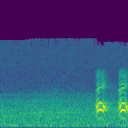

------------------------------------------------------------
File: /Users/baranserajelahi/.fastai/cache/rs_44100/0.wav-3f1363b082eeef31032a38f361c4070d/0.wav
Total Length: 13.64 seconds
Number of Channels: 1
Label: amecro
3.33s-4.82s of original clip


Channel 0.0 (128x128):


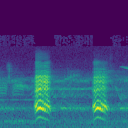

------------------------------------------------------------
File: /Users/baranserajelahi/.fastai/cache/rs_44100/0.wav-8ff316d08e24f687cca5955440f0e44f/0.wav
Total Length: 15.28 seconds
Number of Channels: 1
Label: amecro
10.03s-11.52s of original clip


Channel 0.0 (128x128):


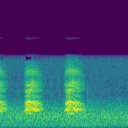

In [67]:
data.show_batch()

In [68]:
learn = audio_learner(data, models.densenet161, metrics=accuracy, callback_fns=ShowGraph, pretrained=True).mixup()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /Users/baranserajelahi/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [ ]:
learn.lr_find(); learn.recorder.plot()